<a href="https://colab.research.google.com/github/Adeola23/google-colab/blob/master/Stage_c_quiz_hamoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df = df.drop(columns="stab")

In [6]:
x = df.drop(columns = "stabf")
y = df["stabf"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgbm
import xgboost as xgb

In [10]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit (x_train, y_train)
rfc_predict = rfc.predict(x_test)


In [11]:
accuracy = accuracy_score(y_test, rfc_predict)
print(round(accuracy,4))

0.929


In [12]:
xg = xgb.XGBClassifier(random_state=1)
xg.fit(x_train, y_train)
xg_predict = xg.predict(x_test)

In [13]:
accuracy = accuracy_score(y_test, xg_predict)
print(round(accuracy,4))

0.9195


In [14]:
lm = lgbm.LGBMClassifier(random_state=1)
lm.fit(x_train, y_train)
lm_predict = lm.predict(x_test)

In [15]:
accuracy = accuracy_score(y_test, lm_predict)
print(round(accuracy,4))

0.9375


In [19]:
xtc = ExtraTreesClassifier(random_state=1)
xtc.fit(x_train, y_train)
xtc_predict = xtc.predict(x_test)

In [29]:
accuracy = accuracy_score(y_test, xtc_predict)
print(round(accuracy,4))

0.928


In [16]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

In [17]:
hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [20]:
rsv = RandomizedSearchCV(estimator=xtc,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=10,
            scoring = 'accuracy',n_jobs = -1,
            verbose = 1, 
            return_train_score = True,
            random_state=1)

In [21]:
search = rsv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished


In [22]:
rsv_predict = rsv.predict(x_test)

In [23]:
search.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [26]:
xtcr = ExtraTreesClassifier(random_state=1, min_samples_leaf=8, min_samples_split=2, n_estimators= 1000)
xtcr.fit(x_train, y_train)
xtcr_predict = xtcr.predict(x_test)

In [28]:
accuracy = accuracy_score(y_test, xtcr_predict)
print(round(accuracy,4))

0.9105


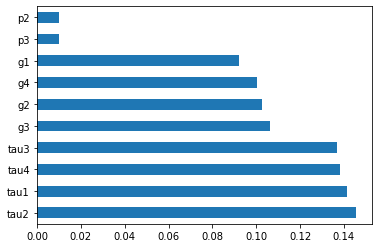

In [32]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(xtcr.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()